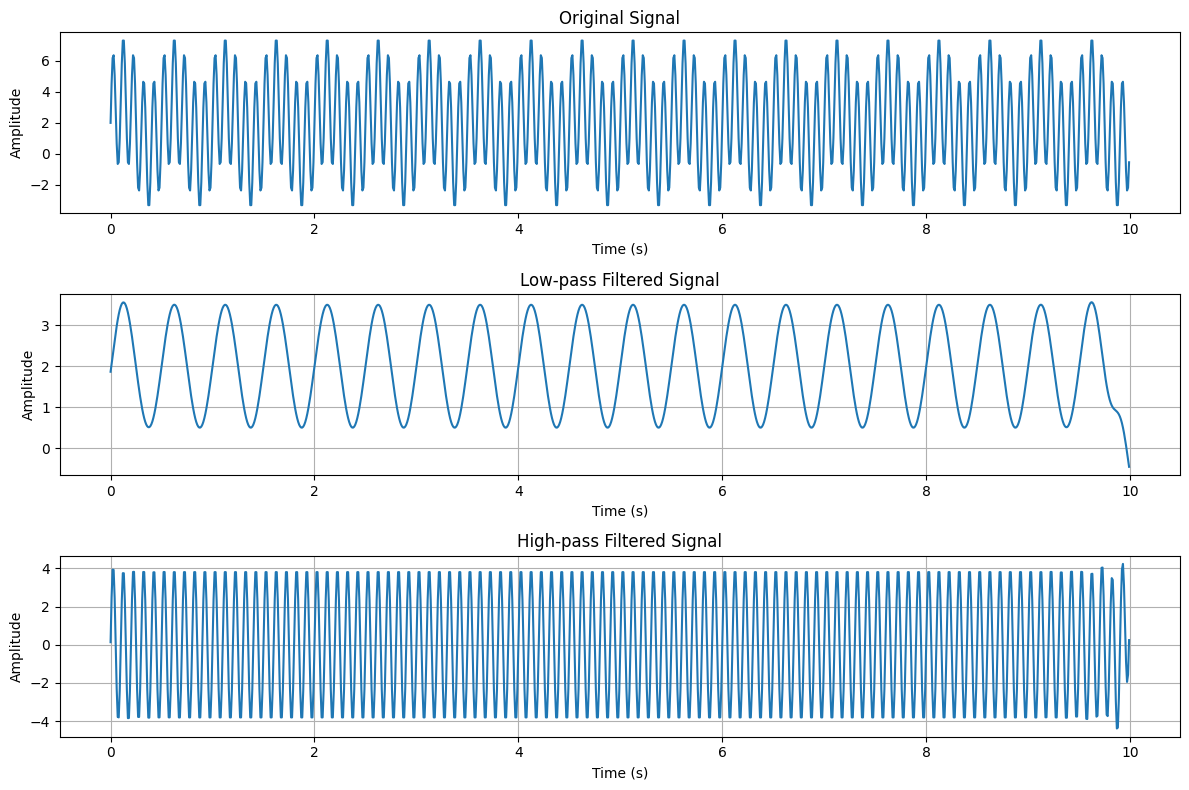

In [7]:
""" Butterworth Filter Example
    Gunnar Pope
    10/13/2023

    An example of using a Butterworth filter to separate a signal into the low frequency and high frequency components.
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate a time array (1 Hz sampling frequency, 10 seconds duration)
T = 10  # Duration in seconds
f_s = 100
t = np.linspace(0, T, T*f_s, endpoint=False)
N = len(t)

# Generate a signal (sum of two sine waves)
f1, f2 = 2, 10  # Frequencies in Hz 
a1, a2 = 1.5, 4
b = 2  # Offset
y = a1*np.sin(2*np.pi*f1*t) + a2*np.sin(2*np.pi*f2*t) + b

# Design Butterworth Filters
low_cutoff = 4  # Low-pass filter cutoff above this frequency
order = 6  # Filter order

# Low-pass Filter
b_low, a_low = butter(order, low_cutoff, btype='lowpass', fs=f_s)
y_low = filtfilt(b_low, a_low, y)

# High-pass Filter
high_cutoff = 4  # High-pass filter cutoff below this frequency
b_high, a_high = butter(order, high_cutoff, btype='highpass', fs=f_s)
y_high = filtfilt(b_high, a_high, y)

# Plot Original and Filtered Signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, y)

plt.subplot(3, 1, 2)
plt.title("Low-pass Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, y_low)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.title("High-pass Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, y_high)
plt.grid(True)

plt.tight_layout()
plt.grid(True)
plt.show()
